# Trabajo I. Simulación de Riesgos y Coberturas

* Guerra Alcalá Daniela
* Hernández Mota Rodrigo
* Rodríguez Cañedo Yolanda

In [19]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import norm

from cvxopt import matrix, solvers  
from financial_series.everything import *

## Introducción

La simulación es una herramienta que permite explorar distintas alternativas y posibilitan que las decisiones sean mejores, rápidas y con una planificación más efectiva. Una definición más formal sería que un modelo de simulación financiera es una representación matemática de una determinada realidad en la que se simplifica la complejidad de la misma con objeto de resaltar aquellas variables que interesan de una forma especial. CITAR
La simulación tiene muchas aplicaciones, sin embargo, en el presente trabajo se utiliza la simulación para la obtención de áreas, volúmenes, generación de trayectorias de activos financieros, valuación de opciones de compra y venta, así como determinación de un portafolio y valuación de su desempeño.
El contenido del documento está dividido en siete secciones:

*	Sección I y II, se expresan dos integrales en términos de valor esperado y se proponen estimadores insesgados.
*	Sección III, se estima el área entre dos curvas.
*	Sección IV, se estima el volumen contenida en una región tridimensional.
*	Sección V, se generan trayectorias del movimiento geométrico browniano.
*	Sección VI, se hace la valuación de opciones.
*	Sección VII, se conforma un portafolio y se valúa su desempeño en base a probabilidades.

## Objetivo Principal


Emplear diversas herramientas y fundamentos teóricos, utilizando simulaciones, para valuar derivados financieros como, en este caso, opciones call y put. Así mismo, generar un portafolio estratégico y valuar su desempeño con simulaciones y en base a probabilidades.

## Objetivos Secundarios

* Proponer estimadores insesgados para integrales definidas.
* Entender el teorema del valor medio para integrales.
* Estimar áreas y volúmenes en un rango o superficie dada mediante simulaciones Montecarlo.
* Generar trayectorias utilizando la de la ecuación diferencial estocástica del precio de un activo con diferentes métodos de aproximación.
* Valuar opciones call y put utilizando diferentes metodologías.
* Entender la diferencia y hacer comparaciones con variables antitéticas.
* Conformar un portafolio y evaluar si desempeño basado en probabilidades con simulación Montecarlo.



### 1. Considere la siguiente integral:

$$
\int_1^3 e^{x^2} dx
$$

** a) Solución de la integral en términos de valor esperado **

$$
E \big[e^{x^2}\big] = \int_1^3 \frac{e^{x^2}}{3-1} dx
$$

$$
\int_1^3 e^{x^2} dx = (3-1) E \big[e^{x^2}\big]
$$


#### b) Estimador insesgado y consistente basado en simulación Montecarlo

El estimador insesgado de la integral anterior está dado por el promedio de la función $f(x)$, multiplicado por el rango de la función.

$$
\int_1^3 e^{x^2} dx \approx \frac{3-1}{n} \sum_{i = 1}^n e^{x_i^2}      
$$

La variable $x$ se distribuye de manera uniforme:

$$
x_i \sim U[a,b]
$$

Comprobación del estimador insesgado: 

$$
E \big[\frac{2}{n} \sum_{i = i}^n e^{x_i^2}\big] = \frac{2}{n} \int_{-\infty}^{\infty} \sum_{i = i}^n e^{x_i^2} p(x) dx
$$

$$
\frac{2}{n} \int_1^3 \sum_{i = i}^n e^{x_i^2} \frac{1}{3-1} dx
$$

$$
\frac{1}{n} \sum_{i = i}^n \int_1^3 e^{x_i^2} dx = \int_1^3 e^{x^2} dx
$$

** c) Relación del estimador de la integral con la expresión en términos de valor esperado y con el teorema del valor medio para integrales **

La integral de una función $f(x)$ es igual al valor promedio de la función, multiplicado por la longitud del intervalo.

$$
\int_a^b f(x) dx = (b-a) f(c)
$$
donde 
$$
c\in[a,b] 
$$ 
y $f(c)$ es el valor promedio de la función

El mejor estimador de lo anterior es el promedio de las $f(x)$ en cada punto, multiplicado por la longitud del intervalo.
$$
\int_a^b f(x) dx \approx \frac{b-a}{n} \sum_{i=1}^n f(x_i)
$$
donde
$$
x = [a, a+\Delta x, a+2 \Delta x ,...,b]
$$


PENDIENTE


$$
\int_a^b f(x) dx = (b-a) E[f(x)]
$$
donde
$$
x \sim U[a,b]
$$

$$
\int_a^b f(x) dx = \frac{b-a}{n} \sum_{i=1}^n f(x_i)
$$
donde
$$
x_i \sim U[a,b]
$$

$$
\int_1^3 e^{x^2} dx = \frac{2}{n} \sum_{i=1}^n e^{x_i ^2}
$$

#### d) Propuesta de otro estimador con variables antitéticas y comparación de ambos

PENDIENTE

### 2. Considere la siguiente integral:

$$
\int_1^2 \frac{1}{1+x} dx
$$

#### a) Solución de la integral en términos de valor esperado

$$
E \big[\frac{1}{1+x}\big] = \int_1^2 \frac{1}{1+x} \frac{1}{2-1} dx
$$

$$
\int_1^2 \frac{1}{1+x} dx = (2-1) E \big[\frac{1}{1+x}\big]
$$

#### b) Estimador insesgado y consistente basado en simulación Montecarlo

El estimador insesgado de la integral anterior está dado por el promedio de la función $f(x)$, multiplicado por el rango de la función.

$$
\int_1^2 \frac{1}{1+x} dx \approx \frac{2-1}{n} \sum_{i = 1}^n \frac{1}{1+x_i}   
$$

La variable $x$ se distribuye de manera uniforme:

$$
x_i \sim U[a,b]
$$

Comprobación del estimador insesgado: 

$$
E \big[\frac{1}{n} \sum_{i = i}^n \frac{1}{1+x_i}\big] = \frac{1}{n} \int_{-\infty}^{\infty} \sum_{i = i}^n \frac{1}{1+x_i} p(x) dx
$$

$$
\frac{1}{n} \int_1^2 \sum_{i = i}^n \frac{1}{1+x_1} \frac{1}{2-1} dx
$$

$$
\frac{1}{n} \sum_{i = i}^n \int_1^2 \frac{1}{1+x_i} dx = \int_1^2 \frac{1}{1+x_i} dx
$$

#### c) Relación del estimador de la integral con la expresión en términos de valor esperado y con el teorema del valor medio para integrales

La integral de una función $f(x)$ es igual al valor promedio de la función, multiplicado por la longitud del intervalo.

$$
\int_a^b f(x) dx = (b-a) f(c)
$$
donde 
$$
c\in[a,b] 
$$ 
y $f(c)$ es el valor promedio de la función

El mejor estimador de lo anterior es el promedio de las $f(x)$ en cada punto, multiplicado por la longitud del intervalo.
$$
\int_a^b f(x) dx \approx \frac{b-a}{n} \sum_{i=1}^n f(x_i)
$$
donde
$$
x = [a, a+\Delta x, a+2 \Delta x ,...,b]
$$


PENDIENTE


$$
\int_a^b f(x) dx = (b-a) E[f(x)]
$$
donde
$$
x \sim U[a,b]
$$

$$
\int_a^b f(x) dx = \frac{b-a}{n} \sum_{i=1}^n f(x_i)
$$
donde
$$
x_i \sim U[a,b]
$$

$$
\int_1^2  dx = \frac{1}{n} \sum_{i=1}^n \frac{1}{1+x_i}
$$

#### d) Propuesta de otro estimador con variables antitéticas y comparación de ambos

PENDIENTE

### 3. Considere las siguientes parábolas:

$$
P_1(x) = x^2 - x + \frac{1}{2}
$$

$$
P_2(x) = -x^2 + x + \frac{1}{2}
$$

#### a) Área delimitada por las parábolas anteriores: Cálculo

Para obtener los puntos que delimitan al intervalo (raíces de la función) en el que estará el área entre las dos parábolas, se igualan ambas funciones y se despeja la variable $x$.

$$
x^2 - x + \frac{1}{2} = -x^2 + x + \frac{1}{2} \\
2x^2 - 2x = 0 \\
2(x^2 -x) = 0 \\
x^2 -x = 0 \\
x(x-1) = 0 \\
x_1 = 1 \\
x_2 = 0 \\
$$

A continuación se muestra la gráfica de ambas parábolas, donde se observa los puntos que delimitan al área a obtener.

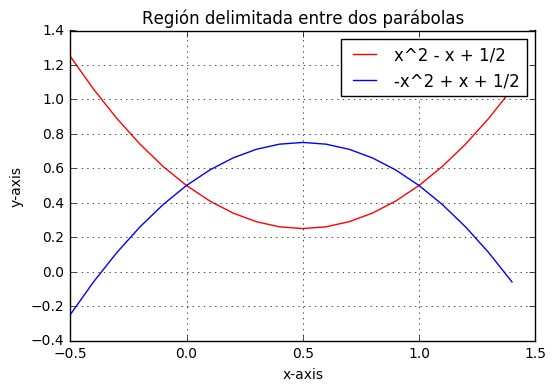

In [4]:
def f1(x):
    return x**2 - x + 1/2 

def f2(x):
    return -x**2 + x + 1/2


x = np.arange(-0.5,1.5,0.1)

plt.plot(x,f1(x),'r')
plt.plot(x,f2(x),'b')
plt.legend(['x^2 - x + 1/2','-x^2 + x + 1/2'])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Región delimitada entre dos parábolas')
plt.grid()
plt.show()

$$
\int_0^1 -x^2 + x + \frac{1}{2} - (x^2 - x + \frac{1}{2}) dx \\
= \int_0^1 -2x^2 + 2x dx \\
= -2 \frac{x^3}{3} + 2 \frac{x^2}{2} \big|_0^1 = -\frac{2x^3}{3} + x^2 \big|_0^1 \\
= -\frac{2(1)^3}{3} + (1)^2 \big|_0^1 \\
= -\frac{2}{3} + 1 \\
= \frac{1}{3}
$$

** b) Área delimitada por las parábolas anteriores: Simulación Montecarlo , valor medio de las parábolas en un intervalo $P_2(x)-P_1(x)$ en el intervalo [0,1] **

Para obtener esta área se utiliza el teorema de valor medio ...PENDIENTE

In [6]:
from numpy.random import uniform

def properIntegral(f,a,b,n=10**5):
    return (b-a)*sum(list(map(f,uniform(a,b,size=n))))/n

def changeLimits(a,b):
    a = -np.pi/2 if a=='-inf' else np.arctan(a)
    b =  np.pi/2 if b=='inf'  else np.arctan(b)
    return a,b

def integral(f,a,b,n=10**5):
    f_u = lambda x: 2*f(np.tan(x))/(1+np.cos(2*x))
    a,b = changeLimits(a,b)
    return properIntegral(f_u,a,b)

In [12]:
area_vm = integral(f2,0,1) - integral(f1,0,1)

print('El área delimitada por las parábolas utilizando la metodología del'
      +' valor medio en el intervalo [a,b] es de {:0.4}'.format(area_vm))

El área delimitada por las parábolas utilizando la metodología del valor medio en el intervalo [a,b] es de 0.3332


** c) Área delimitada por las parábolas anteriores: Simulación Montecarlo , proporción de puntos en el cuadro $[0,1] x [0,1]$ entre las parábolas **

Se generaon números aleatorios uniformes para $x,y$ que cumplen con:
$$
(x,y) \quad\big|\quad \big\{0 \leq x \leq 1 \quad \textrm{and} \quad x^2 - x + \frac{1}{2} \leq y \leq -x^2 + x + \frac{1}{2}\big\}
$$

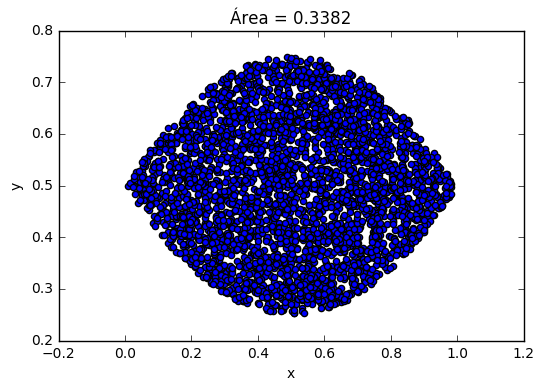

In [21]:
def region(x,y):   
    return (0<x) and (x<1) and (x**2 - x + 1/2 < y) and (y < -x**2 +x + 1/2)

# define number of points 
n_points = 10**4

# define limits
x0,x1=0,1
y0,y1=0,1

# generate random pair of numbers
datapoints = pd.DataFrame({'x':np.random.uniform(x0,x1,n_points),'y':np.random.uniform(y0,y1,n_points)})

# datapoints that satisfy f(.)
valid = datapoints.apply(lambda x: region(x[0],x[1]),1)

# calculate area
area = (x1-x0)*(y1-y0)*sum(valid)/n_points
# plot result 
datapoints[valid].plot(kind='scatter',x='x',y='y')
plt.title('Área = {}'.format(area))
plt.show()

#### d) Diferencias entre en método del punto b) y c)

PENDIENTE

#### e) Usando variables antitéticas y comparación de ambos métodos

### 4. Estimación del volumen de un elipsoide definido por:

$$
2 + 4x^2 + 4z^2 + y^2 \leq 4x + 4z + y
$$

### contenido en el cubo unitario:

$$
0 \leq x,y,z \leq 1
$$

In [23]:
def region(x,y,z):
    return 2 + 4*x**2 + 4*z**2 + y**2 <= 4*x +4*z +y

# define number of points 
n_points = 10**4

# define limits
x0,x1=0,1
y0,y1=0,1
z0,z1=0,1

# generate random pair of numbers
datapoints = pd.DataFrame({'x':np.random.uniform(x0,x1,n_points),'y':np.random.uniform(y0,y1,n_points),'z':np.random.uniform(z0,z1,n_points)})

# datapoints that satisfy f(.)
valid = datapoints.apply(lambda x: region(x[0],x[1],x[2]),1)

# calculate area
vol = (x1-x0)*(y1-y0)*(z1-z0)*sum(valid)/n_points
print('El volumen de la región delimitada es de: {:.4}'.format(vol))

El volumen de la región delimitada es de: 0.1303


#### Estimación del error

In [25]:
vol_real = np.pi/24
error = vol_real - vol
print('El error de la estimación del volumen es de: {}'.format(error))

El error de la estimación del volumen es de: 0.0005996938995747048


#### Nueva estimación con variables antitéticas

#### Comparación

### 5. Considere la siguiente ecuación diferencial estocástica (EDE), que representa el movimiento geométrico browniano:

$$
dln S_t = (\mu - \frac{1}{2} \sigma^2) dt + \sigma dW_t
$$

### donde la solución de la ecuación anterior está dada por:

$$
S_t = S_0 e^{(\mu - \frac{1}{2} \sigma^2) + \sigma W_t}
$$

#### a) Propuesta de un generador de trayectorias del movimiento geométrico browniano basado en la solución

In [26]:
def mTrajectoriesNormal(S0=100,mu=0,sigma=0.2,T=1,n=360,m=1):
    dt = T/n
    mu_t, sigma_t = (mu-sigma**2/2)*dt, sigma*np.sqrt(dt)
    rnd = list(map(lambda x: np.random.normal(mu_t,sigma_t,n),range(m)))
    log_increment = [np.concatenate([np.array([np.log(S0)]),i]) for i in rnd]
    log_path      = [np.cumsum(i) for i in log_increment]
    return pd.DataFrame(np.asmatrix([np.exp(i) for i in log_path]).T)

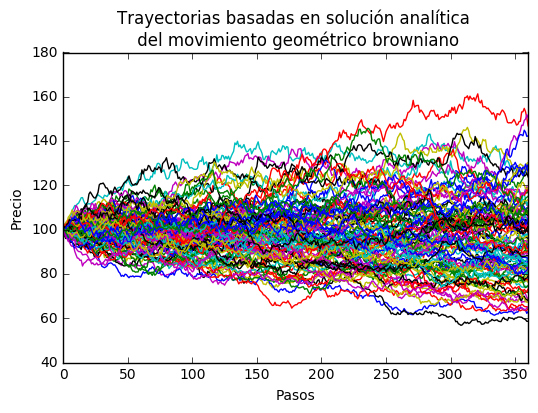

In [39]:
tray = mTrajectoriesNormal(m=100)
tray.plot(legend=False)
plt.title('Trayectorias basadas en solución analítica \n del movimiento geométrico browniano')
plt.ylabel('Precio')
plt.xlabel('Pasos')
plt.show()

#### b) Propuesta de un generador de trayectorias del movimiento geométrico browniano basado en la solución usando variables antitéticas

PENDIENTE

#### c) Propuesta de un generador de trayectorias del movimiento geométrico browniano basado en el método de Euler-Maruyama para aproximar la estimación

**Explicación del método**

Este es un método muy efectivo para aproximar la solución numérica a una ecuación diferencial estocástica. Permite aplicar el método Euler generalizado para ecuaciones diferenciales ordinarias, en ecuaciones diferenciales estocásticas.\

Podemos escribir la ecuaci\'on diferencial de la siguiente manera:

$$
dX_{(t)} = f(X_{(t)}) dt + g(X_{(t)}), \qquad X(0) = X_0, \quad 0 \leq t \leq T
$$

Lo primero que se debe hacer para poder aplicar el método Euler-Maruyama a la ecuación anterior es discretizar el intervalo [0,T]. Sea $\Delta_t = \frac{T}{L}$ para el entero positivo L, y $\tau_i = i\Delta_t$. La aproximación numérica a X($\tau_i$) se denotará como $X_i$. Reescribimos la ecuación de la siguiente manera:

$$
X_i = X_{i-1} + f(X_{i-1}) \Delta_t + g(X_{i-1})(W_{\tau_i}-W_{\tau_{i-1}}),  \hspace{0.5cm} i = 1,2,...,n
$$

Aplicando el método a un movimiento geométrico browniano, la ecuación $dX_{(t)}$ se modifica, quedando de la siguiente manera:

$$
dX_{(t)} =\mu X_{(t)} dt + \sigma X_{(t)} dWt \hspace{0.5cm} donde \hspace{0.5cm} X(0) = X_0
$$

Por lo que la ecuación $X_i$ se puede rescribir de la siguiente manera:
$$
\begin{split}
X_i &= X{i-1} + \mu X_{i-1} dt + \sigma X_{i-1} dWt \\
X_i &= X_{i-1} + \mu X_{i-1}\Delta_t + \sigma X_{i-1} \varepsilon_i \sqrt{\Delta_t} , \hspace{0.5cm} \Delta_t = \frac{T}{n} \\
X_i &= X_{i-1} \left(1+ \mu\Delta_t + \sigma \varepsilon_i \sqrt{\Delta_t} \right) , \hspace{0.5cm} \epsilon \sim \mathcal{N}(0,1)
\end{split}
$$


In [2]:
# Eurler maruyama 

def eulerMaruyamaTrajectories(S0=100,mu=0,sigma=0.2,T=1,n=360,m=1):
    dt = T/n
    rnd = list(map(lambda x: np.random.normal(0,1,n),range(m)))
    
    # define euler maruyama algorithm
    def eulerMaruyamaAlgorithm(x0,x_vect,mu,sigma,dt):
        maruyama_simul = []
        for i in x_vect:
            maruyama_simul.append(x0*(1+mu*dt+sigma*i*np.sqrt(dt)))
            x0 = maruyama_simul[-1]
        return np.array(maruyama_simul)
    
    return pd.DataFrame(np.asmatrix(list(map(lambda x: eulerMaruyamaAlgorithm(x0=S0,x_vect=x,mu=mu,sigma=sigma,dt=dt),rnd))).T)
    
    

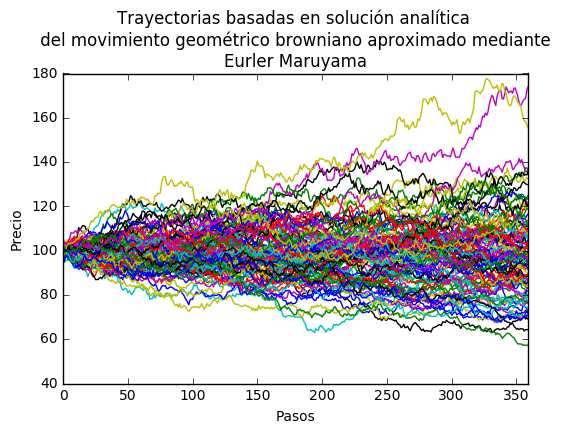

In [4]:
tray = eulerMaruyamaTrajectories(m=100)
tray.plot(legend=False)
plt.title('Trayectorias basadas en solución analítica \n del movimiento geométrico browniano aproximado mediante \nEurler Maruyama')
plt.ylabel('Precio')
plt.xlabel('Pasos')
plt.show()

#### d) Euler-Maruyama para aproximar la estimación, con variables antitéticas

#### e) Propuesta de un generador de trayectorias del movimiento geométrico browniano basado en el método de Milstein para aproximar la estimación

**Explicación del método**

El método Milstein es una técnica para la solución numérica aproximada de una ecuación diferencial estocástica, que trata de mejorar la segunda aproximación de la ecuación del movimiento geométrico browniano, aplicando el lema de Itô. Los coeficientes $\mu$ y $\sigma$ dependen solo de $X$ y no dependen de $t$ directamente.

Considerando las expansiones de los coeficientes $\mu_t = \mu(X_t)$ y $\sigma_t = \sigma(X_t)$, se aumenta la exactitud de la discretizaci\'on. La ecuaci\'on se transforma de la siguiente manera:

$$
X_i = X_{i-1} + f(X_{i-1}) \Delta_t + g(X_{i-1})(W_{\tau_i}-W_{\tau_{i-1}}) + \frac{1}{2}g(X_{i-1})g'(X_{i-1}) \left((W_{\tau_i}-W_{\tau_{i-1}})^2 - \Delta_t \right), \hspace{0.5cm} i = 1,2,...,n
$$

Se añade un término de segundo orden a la ecuación de Euler-Maruyama, la cuál podemos escribir:

$$
X_i = X_{i-1} \left(1+ \mu\Delta_t + \sigma \varepsilon_i \sqrt{\Delta_t} + \frac{1}{2} \sigma^2 \Delta_t \varepsilon_{i-1}^2 - \Delta_t  \right),  \hspace{0.5cm}  \Delta_t = \frac{T}{n}, \hspace{0.5cm}  \varepsilon \sim N(0,1)
$$


In [6]:
def milsteinTrajectories(S0=100,mu=0,sigma=0.2,T=1,n=360,m=1):
    dt = T/n
    rnd = list(map(lambda x: np.random.normal(0,1,n),range(m)))
    
    # define milstein algorithm
    def milsteinAlgorithm(x0,x_vect,mu,sigma,dt):
        milstein_simul = []
        for i in x_vect:
            milstein_simul.append(x0*(1+mu*dt+sigma*i*np.sqrt(dt)+(sigma**2*dt*i**2)/2)-dt)
            x0 = milstein_simul[-1]
        return np.array(milstein_simul)
    
    return pd.DataFrame(np.asmatrix(list(map(lambda x: milsteinAlgorithm(x0=S0,x_vect=x,mu=mu,sigma=sigma,dt=dt),rnd))).T)
    

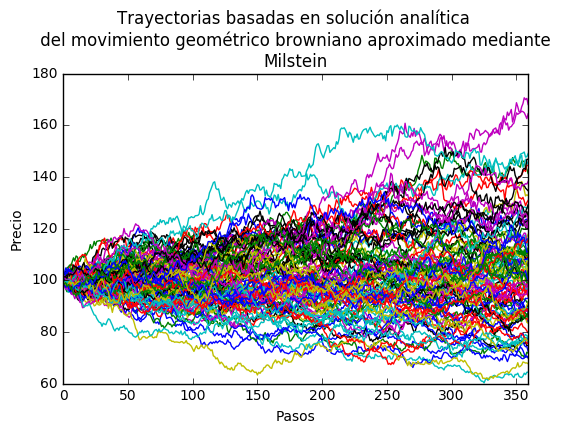

In [8]:
tray = milsteinTrajectories(m=100)
tray.plot(legend=False)
plt.title('Trayectorias basadas en solución analítica \n del movimiento geométrico browniano aproximado mediante \nMilstein')
plt.ylabel('Precio')
plt.xlabel('Pasos')
plt.show()

#### f) Milstein para aproximar la estimación, con variabales antitéticas

#### g) Comparación de algoritmos propuestos teniendo como variables de comparación el tiempo de ejecución y reducción de varianza

### 6. Valuación de opciones

**Opciones**

Son un instrumento financiero, derivado, que se establece en un contrato y da a su comprador el derecho, pero no la obligación, a comprar o vender el activo subyacente a un precio predeterminado, en una fecha de vencimiento. Existen dos tipos de opciones: opción de compra (call) y opción de venta (put).

**Opción Call**

Da a su comprador el derecho a comprar un activo. El vendedor de la opción de compra tiene la obligación de vender el activo en el caso de que el comprador ejerza el derecho a comprar.

Se tienen entonces dos posibilidades:

1. $S_t - K \geq 0 \\$, se compra.
2. $S_t - K < 0 \\$, no se compra.

El precio de una opción call esta dado por:

$$
C_t = e^{-r(T-t)} \hat{E_t}[C_T]
$$

$$
C_T = max(S_T-K,0)
$$

$$
C_t = S_t N(d_1) - Ke^{-r(T-t)} N(d_2)
$$

dónde:
$$
d_1 = \frac{ln\frac{S_t}{K} + (r + \frac{\sigma ^2}{2}) (T-t)}{\sigma \sqrt{T-t}}
$$

y
$$
d_2 = \frac{ln\frac{K}{S_t} + (r - \frac{\sigma ^2}{2}) (T-t)}{\sigma \sqrt{T-t}}
$$

ó
$$
d_2 = d_1 - \sigma \sqrt{T-t}
$$

**Opción Put**

Da a su poseedor el derecho de vender un activo. El comprador de la opción de venta tiene la obligación de comprar el activo subyacente si el tenedor de la opción decide ejercer su derecho.

Se tienen entonces dos posibilidades:

1. $S_t - K > 0\\$, se vende.
2. $S_t - K \leq 0\\$, no se vende.

El precio de una opción put está dado por:

$$
P_t = e^{-r(T-t)} \hat{E_t}[P_T]
$$

$$
P_T = max(K-S_T,0)
$$

$$
P_t = Ke^{-r(T-t)} N(-d_2) + S_t N(-d_1)
$$

dónde $d_1$ y $d_2$ son las mismas que las de la opción call.

#### a) Valuación de una opción call como una integral y cálculo de la prima de opciones call basado en este planteamiento


In [45]:
def analyticBlackScholes(_type,St,K,r,sigma,T,t):
    d1 = (np.log(St/K)+(r+sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1-sigma*np.sqrt(T-t)
    
    if _type=='call':
        return St*norm.cdf(d1)-K*np.exp(-r*(T-t))*norm.cdf(d2)
    if _type=='put':
        return -St*norm.cdf(-d1)+K*np.exp(-r*(T-t))*norm.cdf(-d2)
    
    print('Error: Type not found.')
    return None

In [60]:
r = 0.0629
St = 100
K = 102
sigma = 0.18
T = 1
t = 0
call_abs = analyticBlackScholes('call',St,K,r,sigma,T,t)
print('La prima de una opción call basada en la solución analítica de Black Scholes es de: {:.4}'.format(call_abs))

La prima de una opción call basada en la solución analítica de Black Scholes es de: 9.329


#### b) Valuación de una opción put como una integral y cálculo de la prima de opciones put basado en este planteamiento

In [58]:
put_abs = analyticBlackScholes('put',St,K,r,sigma,T,t)
print('La prima de una opción put basada en la solución analítica de Black Scholes es: {:.4}'.format(put_abs))

La prima de una opción put basada en la solución analítica es: 5.111


#### c) Valuación de una opción call en términos de la solución de la EDE del precio y cálculo de la prima de opciones

$$
C_t = e^{-r(T-t)} \hat{E_t}[C_T]
$$

$$
C_T = max(S_T-K,0)
$$

$$
\hat{C_t} = e^{-r(T-t)} \frac{1}{n} \sum_{i = 1}^n max(S_{Ti}-K,0)
$$

In [74]:
def numericBlackScholes(_type,St,r,mu=0,sigma=0.2,T=1,n=360,m=100):
    if _type=='call':
        df = mTrajectoriesNormal(m=m,S0=St,mu=mu,sigma=sigma)
        return np.exp(-r*(T-t))*((df.iloc[-1]-K).apply(lambda x: 0 if x <=0 else x).mean())
    if _type=='put':
        df = mTrajectoriesNormal(m=m,S0=St,mu=mu,sigma=sigma)
        return np.exp(-r*(T-t))*((K-df.iloc[-1]).apply(lambda x: 0 if x <=0 else x).mean())

In [114]:
call_nbs = numericBlackScholes('call',St,r,mu=r,sigma=0.2,T=1,n=360,m=1000)
print('La prima de una opción call basada en la estimación numérica de Black Scholes es de: {:.4}'.format(call_nbs))

La prima de una opción call basada en la estimación numérica de Black Scholes es de: 10.11


#### d) Valuación de una opción put en términos de la solución de la EDE del precio y cálculo de la prima de opciones

$$
P_t = e^{-r(T-t)} \hat{E_t}[C_T]
$$

$$
C_T = max(K-S_T,0)
$$

$$
\hat{P_t} = e^{-r(T-t)} \frac{1}{n} \sum_{i = 1}^n max(K-S_{Ti},0)
$$

In [115]:
put_nbs = numericBlackScholes('put',St,r,mu=r,sigma=0.2,T=1,n=360,m=1000)
print('La prima de una opción put basada en la estimación numérica de Black Scholes es de: {:.4}'.format(put_nbs))

La prima de una opción put basada en la estimación numérica de Black Scholes es de: 6.261


#### e) Valuación de una opción call en términos de la solución de una aproximación numérica para la EDE y cálculo de la prima de opciones

#### f) Valuación de una opción put en términos de la solución de una aproximación numérica para la EDE y cálculo de la prima de opciones

#### g) Métodos propuestos con reducción de varianza

#### Comparación de resultados con Black Scholes

#### Comparación con el resultado obtenido en la calculadora de opciones Montgomery Investment Technology

### 7. Portafolio de activos reales y su desempeño basado en probabilidades estimadas por el método Monte Carlo

** Descargar precios **

In [10]:
stock_name = ['AMXL.MX', 'ASURB.MX', 'ELEKTRA.MX', 'GMEXICOB.MX', 'GRUMAB.MX',
       'IENOVA.MX', 'KOFL.MX', 'LABB.MX', 'TLEVISACPO.MX']


# Determine time-range
_from, _to = '2016/01/01', dt.datetime.strftime(dt.datetime.now(),'%Y/%m/%d')


# Download and plot prices
stock = {}
for s in stock_name:
    stock[s] = Stock(units='MXN',stock_name=s,t0=_from,tf=_to)
    stock[s].fill()

** Determinación del portafolio **

In [11]:
def getAllPrices(dct):
    
    # get first item 
    first = list(dct.keys())[0]
    price = {first:dct[first].prices.Adj_close}
    price = pd.DataFrame(price, index=price[first].index)
    
    # get other items 
    for k in dct:
        
        if k in [first]:
            continue
        
        # calculate temporal dataframe 
        temp = {k:dct[k].prices.Adj_close}
        temp = pd.DataFrame(temp, index=temp[k].index)
        
        # concatenate
        price = pd.concat([price, temp],axis=1).dropna()
        
    return price

def getAllReturns(dct, _type='log'):
    
    prices = getAllPrices(dct)
    returns = {}
    for i in prices:
        temp = prices[i].values
        if _type == 'log':
            returns[i] = np.log(temp[1:] / temp[:-1])
        if _type == 'nor' or _type == 'simple' or _type == 'sim':
            returns[i] = temp[1:] / temp[:-1] - 1
    return pd.DataFrame(returns, index=prices.index[1:])


def randomProp(n):
    random_numbers = np.random.uniform(0,1,n)
    return random_numbers/sum(random_numbers)

In [12]:
prices = getAllPrices(stock)
returns = getAllReturns(stock, _type='log')
covariance = returns.cov()

In [13]:
# Means 
print("Return's mean:")

returns_means = returns.mean()
pd.DataFrame(np.asmatrix(returns_means.values),columns=returns_means.index)

Return's mean:


,AMXL.MX,ASURB.MX,ELEKTRA.MX,GMEXICOB.MX,GRUMAB.MX,IENOVA.MX,KOFL.MX,LABB.MX,TLEVISACPO.MX
0,0.000232,0.000891,-0.000511,0.00158,0.000292,0.000472,0.000303,0.001611,0.000236


In [14]:
# Standard Deviation
print("Return's std:")

returns_std = returns.std()
pd.DataFrame(np.asmatrix(returns_std.values),columns=returns_std.index)

Return's std:


,AMXL.MX,ASURB.MX,ELEKTRA.MX,GMEXICOB.MX,GRUMAB.MX,IENOVA.MX,KOFL.MX,LABB.MX,TLEVISACPO.MX
0,0.01781,0.013719,0.013909,0.019039,0.014043,0.013216,0.012895,0.022623,0.016226


** Determinación de proporciones **

In [15]:
def getSolutionMkw(returns,alpha_1=1,alpha_2=1):
    """
    Returns an optim.porfolio f
    """
    solvers.options['show_progress'] = False
    
    # number of variables
    r = returns.shape[1]
    
    # mean and covariance
    _mean = returns.mean()
    _cov  = returns.cov()

    # parameters
    P = matrix(alpha_2*_cov.values)
    Q = matrix(-alpha_1*_mean.values)
    G = matrix(-1.*np.identity(r))
    h = matrix([0. for i in range(r)])
    A = matrix([1. for i in range(r)], (1,r))
    b = matrix(1.)
    
    # get solution
    sol = solvers.qp(P,Q,G,h,A,b)
    
    return np.asmatrix([i for i in sol['x']])

In [16]:
alpha2range=np.arange(1,500)
def iterativeSelectionProcess(returns,w_opt_list=None,tolerance=0.05,alpha2range=np.arange(1,500)):
    
    if w_opt_list is None: 
        w_opt_list =  [getSolutionMkw(returns,alpha_2=a2) for a2 in alpha2range]
    
    save_sum = []
    for i in w_opt_list:
        temp = [i[0,j] for j in range(np.shape(i)[1])]
        save_sum = (save_sum + np.array(temp)) if len(save_sum)!=0 else np.array(temp)

    selection = pd.DataFrame(save_sum).apply(lambda x: x>tolerance).values
    cont = len(selection) - np.sum(selection)
    selection = [j for i,j in zip(selection,returns.columns) if i]
    return returns[selection],cont,save_sum

In [17]:
returns = getAllReturns(stock, _type='log')

In [20]:
condition = True
w_opt_list = None 
while(condition):
    returns, cond, ss = iterativeSelectionProcess(returns,w_opt_list,tolerance=0.05*500)
    w_opt_list = [getSolutionMkw(returns,alpha_2=a2) for a2 in np.arange(1,500)]
    condition = False if cond == 0 else condition

** Gráfica de la frontera eficiente Markowitz **

In [21]:
def randomPortfolio(returns):
    w = np.asmatrix(np.random.dirichlet(np.ones(returns.shape[1]),size=1)[0])#np.asmatrix(randomProp(returns.shape[1]))
    rp = w.dot(np.asmatrix(returns.mean().values).T)
    rp = np.asscalar(rp)
    
    varp = w.dot(np.asmatrix(returns.cov().values)).dot(w.T)
    varp = np.asscalar(varp)
    
    return rp, np.sqrt(varp)

def generateMultiplePortfolios(m,returns):
    results = {'rp':[],'std':[]}
    
    for i in range(m):
        temp = randomPortfolio(returns)
        results['rp'].append(100*temp[0])
        results['std'].append(100*temp[1])
        
    return pd.DataFrame(results)

def calculatePortfolio(w,returns):
    rp = w.dot(np.asmatrix(returns.mean().values).T)
    rp = np.asscalar(rp)
    
    varp = w.dot(np.asmatrix(returns.cov().values)).dot(w.T)
    varp = np.asscalar(varp)
    
    return 100*rp, 100*np.sqrt(varp)

In [22]:
# Simulate random portfolio 

portfolios = generateMultiplePortfolios(8000,returns)

In [23]:
# Generate Efficient Curve portfolio

port_opt = []
for i in w_opt_list:
    port_opt.append(calculatePortfolio(i,returns))
    
port_opt = pd.DataFrame(port_opt)

In [24]:
port_opt.index = alpha2range

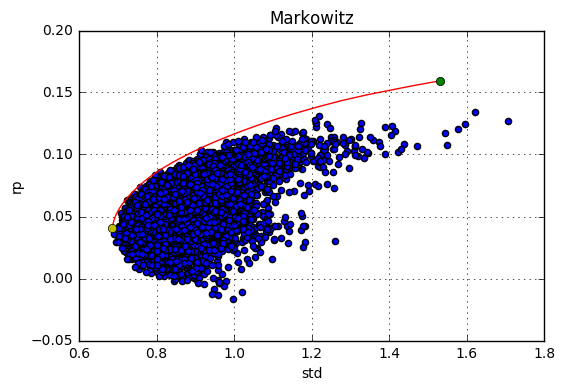

In [25]:
# Plot 


# all portfolios 
portfolios.plot(kind='scatter',x='std',y='rp',grid=True)

# efficient portfolio frontier
plt.plot(port_opt[1],port_opt[0],'r-')

# more risk and returns 
plt.plot(port_opt[1].iloc[0],port_opt[0].iloc[0],'go')

# least risk and returns 
plt.plot(port_opt[1].iloc[-1],port_opt[0].iloc[-1],'yo')

# aesthetics... 
plt.title('Markowitz')
plt.show()

In [28]:
# Select final portfolio 

w_opt = w_opt_list[-1]
pd.DataFrame(100*w_opt)

,0,1,2,3,4,5,6,7,8
0,7.775613,6.759258,15.471965,8.72733,17.699798,19.785641,10.92946,4.260401,8.590534


In [44]:
w_opt = np.asarray(w_opt).reshape(-1)

** Simulación del portafolio **

In [32]:
n_capital = 1000000

In [33]:
def simulate(mu=np.array([0,0]),cov=np.array([[0.2,0],[0,0.2]]),S0=[100,100],T=1,n=360,m=2):
    sigma = [np.sqrt(cov[i][i]) for i in range(len(mu))]
    v = np.linalg.cholesky(cov)
    
    # calculate correlated random numbers
    def generateCorrNumbers(v,nvar,length):
        z_corr = np.asmatrix(v).T.dot(np.asmatrix(np.random.normal(0,1,size=(nvar,length))))
        return np.asarray(z_corr)
    
    # function to generate a single trajectory 
    def generateTraj(S0,mu,sigma,T,n,random_list):
        dt = T/n
        mu_t, sigma_t = (mu-sigma**2/2)*dt, sigma*np.sqrt(dt)
        random_list = mu_t + sigma_t*np.asarray(random_list)
        log_increment = [np.log(S0)]+[i for i in random_list]#np.concatenate([np.array([np.log(S0)]),np.array()])
        log_path      = np.cumsum(log_increment)
        return np.exp(log_path)
      
    random_numbers=[generateCorrNumbers(v,len(mu),n) for i in range(m)]
    
    stocks = [[] for i in range(len(mu))]
    for rnd in random_numbers:
        for i in range(len(mu)):
            stocks[i].append(generateTraj(S0[i],mu[i],sigma[i],T,n,rnd[i]))
            
        
    return [pd.DataFrame(np.asmatrix(s).T) for s in stocks]

In [36]:
prices[returns.columns].iloc[-1]

AMXL.MX           12.57
ASURB.MX         315.25
ELEKTRA.MX       321.05
GMEXICOB.MX       59.31
GRUMAB.MX        262.68
IENOVA.MX         83.60
KOFL.MX          132.98
LABB.MX           22.82
TLEVISACPO.MX    101.16
Name: 2017-03-14 00:00:00, dtype: float64

In [49]:
n_stocks = (w_opt*n_capital / prices[returns.columns].iloc[-1]).apply(int).values
n_stocks

array([6185,  214,  481, 1471,  673, 2366,  821, 1866,  849])

In [54]:
initial_value_stock = (n_stocks*prices[returns.columns].iloc[-1,:]).sum()
initial_value_stock

999103.7899999999

In [53]:
cash = n_capital - initial_value
cash

896.2100000000792

In [ ]:
mu = returns.mean().values
cov= returns.cov().values
S0 = prices[returns.columns].iloc[-1,:].values

In [ ]:
m = 500
simulation = simulate(mu,cov,S0,m=m)

In [ ]:
port_value = np.array(m*[0])
port_vect = []
c = 1
for i,j in zip(simulation,n_stocks):
    if len(port_vect) == 0:
        port_vect  = j*i
    else:
        port_vect = port_vect+j*i
    port_value = port_value + j*i.iloc[-1,:].values
    c += 1

In [ ]:
temp = port_vect.iloc[-1]
print('Information at maturity.\n\n> Min value: {}\n> Max value: {}\n> Mean: {}\n> Std: {}'.format(temp.min(),temp.max(),temp.mean(),temp.std()))

port_vect.plot(legend=False,grid=True)
plt.title('Portfolio Simulation')
plt.show()

In [ ]:
def getProbabilityGreaterThan(value,vector):
    return sum(vector>value) / len(vector)

In [ ]:
print('Initial value of the portfolio: {}'.format(initial_value))
print('Average Final Value: {}'.format(np.mean(port_value)))
print('Probability for the portafolio to be grater than the initial value at maturity: {} %'.format(
        100*getProbabilityGreaterThan(initial_value,port_value)))

In [ ]:
prev = 0
step = 0.0005
for i in np.arange(step,0.02,step):
    ref = getProbabilityGreaterThan(initial_value*(1+prev),port_value)
    pr  = getProbabilityGreaterThan(initial_value*(1+i),port_value)
    print('Probability that portfolio increases from {:0.2f}% to {:0.2f}% is: {:0.4}%'.format(100*prev,100*i,100*(ref-pr)))
    prev = i
    if pr < 0.000001:
        break 

## Conclusiones, recomendaciones, trabajos futuros

## Bibliografía